In [113]:
import requests
import numpy as np
import pandas as pd
import sklearn.ensemble as sk
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.neighbors
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [114]:
sex_dic={'male':0,'female':1}
embarked_dic={'S':0,'C':1,'Q':2}
def rename(df):
    df['Sex']=map(lambda x: sex_dic[x],df['Sex'])
    df['Embarked']=map(lambda x: embarked_dic[x],df['Embarked'])
    return df

1. Creat three train data subsets: (1) with all features (2) without age (3) without age and Fare
===

In [115]:
train=pd.read_csv('train.csv')
train.head()

train1=train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']].copy()
train2=train[['PassengerId','Pclass','Sex','SibSp','Parch','Fare','Embarked','Survived']].copy()
train3=train[['PassengerId','Pclass','Sex','SibSp','Parch','Embarked','Survived']].copy()
train1=train1.dropna()
train2=train2.dropna()
train3=train3.dropna()
print train1.shape
print train2.shape
print train3.shape
print train.shape

train1=rename(train1)
train2=rename(train2)
train3=rename(train3)

sub_train1,sub_val1=sklearn.cross_validation.train_test_split(train1,test_size=0.33,random_state=99)
sub_train1=pd.DataFrame(sub_train1)
sub_train1.columns=train1.columns
sub_val1=pd.DataFrame(sub_val1)
sub_val1.columns=train1.columns
print sub_train1.shape
print sub_val1.shape

sub_train2,sub_val2=sklearn.cross_validation.train_test_split(train2,test_size=0.33,random_state=99)
sub_train2=pd.DataFrame(sub_train2)
sub_train2.columns=train2.columns
sub_val2=pd.DataFrame(sub_val2)
sub_val2.columns=train2.columns
print sub_train2.shape
print sub_val2.shape

sub_train3,sub_val3=sklearn.cross_validation.train_test_split(train3,test_size=0.33,random_state=99)
sub_train3=pd.DataFrame(sub_train3)
sub_train3.columns=train3.columns
sub_val3=pd.DataFrame(sub_val3)
sub_val3.columns=train3.columns
print sub_train3.shape
print sub_val3.shape

(712, 9)
(889, 8)
(889, 7)
(891, 12)
(477, 9)
(235, 9)
(595, 8)
(294, 8)
(595, 7)
(294, 7)


2. Import test data and split into three subsets: test1,test2,test3
===

In [42]:
test=pd.read_csv('test.csv')
test_sub=test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()
print test_sub.shape
#test_sub.head()
test1=test_sub
test1=test1.dropna()
test1=rename(test1)
print test1.shape

test_nan=test_sub[test_sub.isnull().any(axis=1)]
print test_nan.shape

test2=test_nan.drop('Age',axis=1)
test2=test2.dropna()
test2=rename(test2)
print test2.shape

test3=test_nan.drop('Age',axis=1)
test3=test3[test3.isnull().any(axis=1)]
test3=rename(test3)
test3=test3.drop('Fare',axis=1)
print test3.shape

print test.shape[0]==test1.shape[0]+test2.shape[0]+test3.shape[0]

(418, 8)
(331, 8)
(87, 8)
(86, 7)
(1, 6)
True


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3. Train data
===

4. Train data with validation
===

In [67]:
def accuracy_for_k_val(k,x,y, random_state=99):
    split_data = sklearn.cross_validation.train_test_split(
                        x,y, test_size=0.33, random_state=random_state)
    x_train, x_val, y_train, y_val = split_data
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
    knn.fit(x_train,y_train)
    y_hat = knn.predict(x_val)
    return sklearn.metrics.accuracy_score(y_val, y_hat, 
                                          normalize=True)

In [68]:
def accuracy_for_k(k,x,y):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
    knn.fit(x,y)
    y_hat = knn.predict(x)
    return sklearn.metrics.accuracy_score(y, y_hat, normalize=True)

In [69]:
def define_x_y(df):
    x=np.asarray(df[df.columns[1:-1]])
    y=np.asarray(df[df.columns[-1]])
    return x,y

In [83]:
def show_confusion_matrix(confusion_matrix):
    plt.matshow(confusion_matrix, cmap=plt.cm.Greys_r)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

(1) train1
----

In [63]:
x,y=define_x_y(train1)

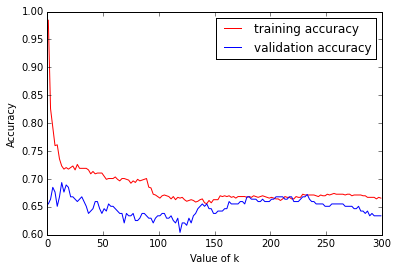

In [70]:
acc_values_val = []
acc_values_train = []

k_values = xrange(1,300,2)
for k in k_values:
    acc_values_train.append(accuracy_for_k(k,x,y))
    acc_values_val.append(accuracy_for_k_val(k,x,y))
    
plt.plot(k_values, acc_values_train, c='r', label="training accuracy")
plt.plot(k_values, acc_values_val, c='b', label="validation accuracy")
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.legend()

fig_cross_val = plt.gcf()

In [71]:
max(acc_values_val)

0.69361702127659575

(2) train2
----

In [74]:
x,y=define_x_y(train2)

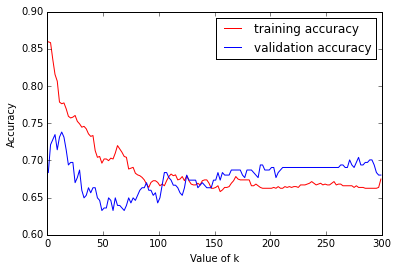

In [75]:
acc_values_val = []
acc_values_train = []

k_values = xrange(1,300,2)
for k in k_values:
    acc_values_train.append(accuracy_for_k(k,x,y))
    acc_values_val.append(accuracy_for_k_val(k,x,y))
    
plt.plot(k_values, acc_values_train, c='r', label="training accuracy")
plt.plot(k_values, acc_values_val, c='b', label="validation accuracy")
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.legend()

fig_cross_val = plt.gcf()

In [76]:
max(acc_values_val)

0.73809523809523814

(3) train3
---

In [77]:
x,y=define_x_y(train3)

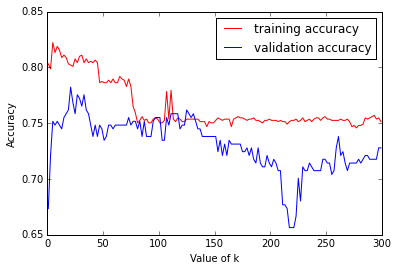

In [78]:
acc_values_val = []
acc_values_train = []

k_values = xrange(1,300,2)
for k in k_values:
    acc_values_train.append(accuracy_for_k(k,x,y))
    acc_values_val.append(accuracy_for_k_val(k,x,y))
    
plt.plot(k_values, acc_values_train, c='r', label="training accuracy")
plt.plot(k_values, acc_values_val, c='b', label="validation accuracy")
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.legend()

fig_cross_val = plt.gcf()

In [87]:
max(acc_values_val)

0.78231292517006801

In [81]:
k_values[acc_values_val.index(max(acc_values_val))]

21

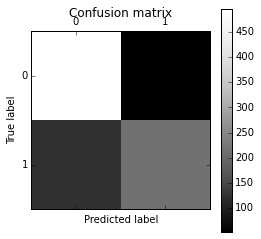

[[496  53]
 [123 217]]


In [84]:
k = 21
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
knn.fit(x,y)
y_hat = knn.predict(x)

confusion_matrix = sklearn.metrics.confusion_matrix(y, y_hat)
show_confusion_matrix(confusion_matrix)
print confusion_matrix

In [100]:
test=pd.read_csv('test.csv')
testt=test[['PassengerId','Pclass','Sex','SibSp','Parch','Embarked']].copy()
testt=testt.dropna()
testt=rename(testt)

In [102]:
x_test=np.asarray(testt[testt.columns[1:]])

In [103]:
k = 21
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=21, p=2, weights='uniform')

In [104]:
y_hat = knn.predict(x_test)

In [105]:
testt['Survived']=y_hat

In [109]:
results=testt[['PassengerId','Survived']].copy()
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [110]:
results.to_csv('knn_result.csv',header=True,index=False)